In [6]:
#!python -V
#!pip install seaborn torch
#!python -m pip install seaborn
#!python3 -m pip install seaborn

Python 3.6.12 :: Anaconda, Inc.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import sklearn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.model_selection import train_test_split

import eli5
from eli5.sklearn import PermutationImportance

/home/alexp/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/alexp/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
full_df = pd.read_csv("/home/alexp/dataset.all.csv")
full_df.head()

,hand_id,player_name,street,player_position,players_in_pot,after_us_decision_players,current_pot_size,player_stack_size,percent_deposited_of_current_stack,pay_for_continue_play,...,board_6_amount,board_5_amount,board_4_amount,board_3_amount,board_2_amount,board_spades_amount,board_hearts_amount,board_diamonds_amount,board_clubs_amount,ready_combination
0,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,PREFLOP,0,0,1,6.00,572.04,0.003484,2.00,...,0,0,0,0,0,0,0,0,0,AIR
1,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,FLOP,0,2,1,26.00,560.04,0.024389,0.00,...,0,0,0,0,0,1,0,0,2,STRAIGHT
2,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,TURN,0,2,1,52.60,546.74,0.047558,0.00,...,0,0,0,0,0,1,1,0,2,STRAIGHT
3,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,TURN,2,2,1,86.83,546.74,0.047558,34.23,...,0,0,0,0,0,1,1,0,2,STRAIGHT
4,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,RIVER,0,2,1,121.06,512.51,0.107188,0.00,...,0,0,0,1,0,2,1,0,2,STRAIGHT


In [4]:
full_df.shape

(2943445, 30)

In [5]:
df_splitted = np.split(full_df, 5)

In [6]:
df = df_splitted[0]

In [7]:
df.shape

(588689, 30)

In [8]:
test = df[df['action'] == 'action']
print(test)

Empty DataFrame
Columns: [hand_id, player_name, street, player_position, players_in_pot, after_us_decision_players, current_pot_size, player_stack_size, percent_deposited_of_current_stack, pay_for_continue_play, current_bet, action, board_ace_amount, board_king_amount, board_queen_amount, board_jack_amount, board_10_amount, board_9_amount, board_8_amount, board_7_amount, board_6_amount, board_5_amount, board_4_amount, board_3_amount, board_2_amount, board_spades_amount, board_hearts_amount, board_diamonds_amount, board_clubs_amount, ready_combination]
Index: []

[0 rows x 30 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588689 entries, 0 to 588688
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   hand_id                             588689 non-null  object 
 1   player_name                         588689 non-null  object 
 2   street                              588689 non-null  object 
 3   player_position                     588689 non-null  int64  
 4   players_in_pot                      588689 non-null  int64  
 5   after_us_decision_players           588689 non-null  int64  
 6   current_pot_size                    588689 non-null  float64
 7   player_stack_size                   588689 non-null  float64
 8   percent_deposited_of_current_stack  588689 non-null  float64
 9   pay_for_continue_play               588689 non-null  float64
 10  current_bet                         588689 non-null  float64
 11  action                    

In [10]:
df.head()

,hand_id,player_name,street,player_position,players_in_pot,after_us_decision_players,current_pot_size,player_stack_size,percent_deposited_of_current_stack,pay_for_continue_play,...,board_6_amount,board_5_amount,board_4_amount,board_3_amount,board_2_amount,board_spades_amount,board_hearts_amount,board_diamonds_amount,board_clubs_amount,ready_combination
0,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,PREFLOP,0,0,1,6.00,572.04,0.003484,2.00,...,0,0,0,0,0,0,0,0,0,AIR
1,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,FLOP,0,2,1,26.00,560.04,0.024389,0.00,...,0,0,0,0,0,1,0,0,2,STRAIGHT
2,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,TURN,0,2,1,52.60,546.74,0.047558,0.00,...,0,0,0,0,0,1,1,0,2,STRAIGHT
3,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,TURN,2,2,1,86.83,546.74,0.047558,34.23,...,0,0,0,0,0,1,1,0,2,STRAIGHT
4,2018-10-26_PS_NL400_SH_6607_hands_192599878130,mishun,RIVER,0,2,1,121.06,512.51,0.107188,0.00,...,0,0,0,1,0,2,1,0,2,STRAIGHT


<AxesSubplot:xlabel='action', ylabel='count'>

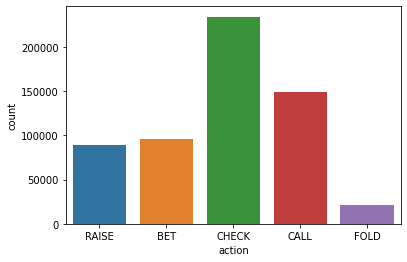

In [11]:
sns.countplot(x = 'action', data=df)

In [12]:
df3 = df[df['player_name'].str.contains("blackw0lf_03") | df['player_name'].str.contains("EXIZAR") | df['player_name'].str.contains("MakoEv") | df['player_name'].str.contains("GiveMeUP") | df['player_name'].str.contains("donald0404")]

In [13]:
df5 = df[df['player_name'].str.contains("elpasoafera") | df['player_name'].str.contains("RAidakCo") | df['player_name'].str.contains("stan_09319") | df['player_name'].str.contains("pogokc") | df['player_name'].str.contains("ac1dd")]

In [14]:
df6 = df[df['player_name'].str.contains("tuff_shark") | df['player_name'].str.contains("xfriendlyx") | df['player_name'].str.contains("moshmachine") | df['player_name'].str.contains("intersoler") | df['player_name'].str.contains("golovorez777")]

In [15]:
df7 = df[df['player_name'].str.contains("AGL_by") | df['player_name'].str.contains("GODofHU") | df['player_name'].str.contains("Ner4zzurri") | df['player_name'].str.contains("boerni21") | df['player_name'].str.contains("Stefan11222")]

In [16]:
df8 = df[df['player_name'].str.contains("marcozevola5") | df['player_name'].str.contains("dccnesquick") | df['player_name'].str.contains("ZilikPSM") | df['player_name'].str.contains("dontmarchrun") | df['player_name'].str.contains("NLZWERVERNL")]

In [17]:
df10 = df[df['player_name'].str.contains("bolecc") | df['player_name'].str.contains("Jayser1337") | df['player_name'].str.contains("ham1l_I0n") | df['player_name'].str.contains("ross_654") | df['player_name'].str.contains("oSpiel888")]

In [18]:
df11 = df[df['player_name'].str.contains("InsomniaRU") | df['player_name'].str.contains("AlexeSsz") | df['player_name'].str.contains("d7o1d1s0") | df['player_name'].str.contains("mrienader") | df['player_name'].str.contains("IseeUcards")]

In [19]:
df12 = df[df['player_name'].str.contains("blackw0lf_03") | df['player_name'].str.contains("EXIZAR") | df['player_name'].str.contains("MakoEv") | df['player_name'].str.contains("GiveMeUP") | df['player_name'].str.contains("donald0404")]

<AxesSubplot:xlabel='player_name', ylabel='count'>

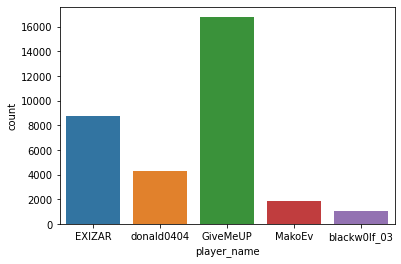

In [20]:
sns.countplot(x = 'player_name', data=df3)


<AxesSubplot:xlabel='player_name', ylabel='count'>

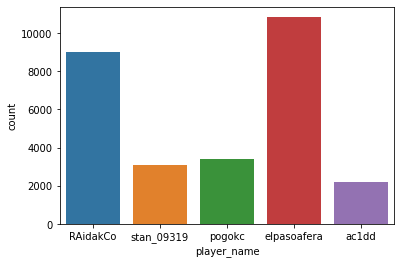

In [21]:
sns.countplot(x = 'player_name', data=df5)


<AxesSubplot:xlabel='player_name', ylabel='count'>

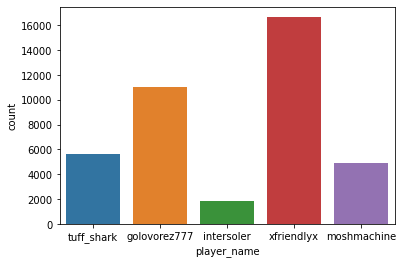

In [22]:
sns.countplot(x = 'player_name', data=df6)


<AxesSubplot:xlabel='player_name', ylabel='count'>

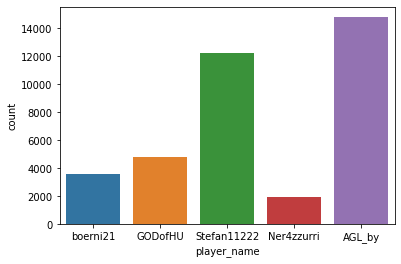

In [23]:
sns.countplot(x = 'player_name', data=df7)


<AxesSubplot:xlabel='player_name', ylabel='count'>

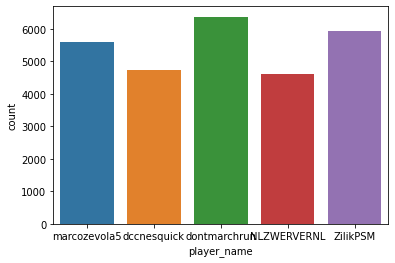

In [24]:
sns.countplot(x = 'player_name', data=df8)


<AxesSubplot:xlabel='player_name', ylabel='count'>

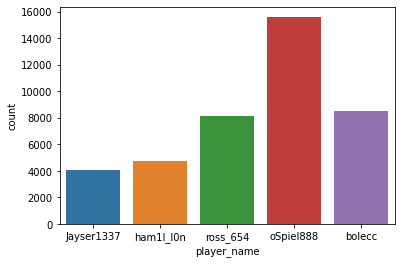

In [25]:
sns.countplot(x = 'player_name', data=df10)


<AxesSubplot:xlabel='player_name', ylabel='count'>

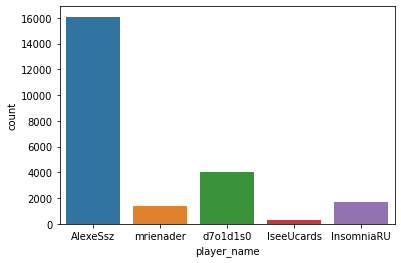

In [26]:
sns.countplot(x = 'player_name', data=df11)


<AxesSubplot:xlabel='player_name', ylabel='count'>

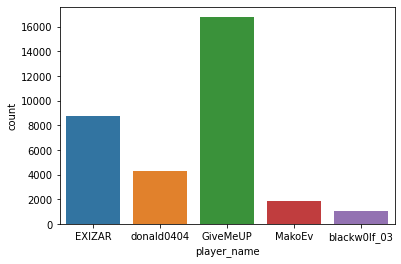

In [27]:
sns.countplot(x = 'player_name', data=df12)

In [28]:
class2idx = {
    "FOLD":0,
    "RAISE":1,
    "CHECK":2,
    "BET":3,
    "CALL":4,
}
idx2class = {v: k for k, v in class2idx.items()}
df['action'].replace(class2idx, inplace=True)

In [29]:
y = df['action'].values
X = df.drop(columns=['action', 'hand_id']).iloc[:]

enc = OrdinalEncoder()
X = enc.fit_transform(X)
#print(enc.categories_)

# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=521)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=170)

In [30]:
#Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [31]:
def get_class_distribution(obj):
    count_dict = {
        "FOLD":0,
        "RAISE":0,
        "CHECK":0,
        "BET":0,
        "CALL":0,
    }

    for i in obj:
        if i == 0:
            count_dict['FOLD'] += 1
        elif i == 1:
            count_dict['RAISE'] += 1
        elif i == 2:
            count_dict['CHECK'] += 1
        elif i == 3: 
            count_dict['BET'] += 1
        elif i == 4: 
            count_dict['CALL'] += 1           
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

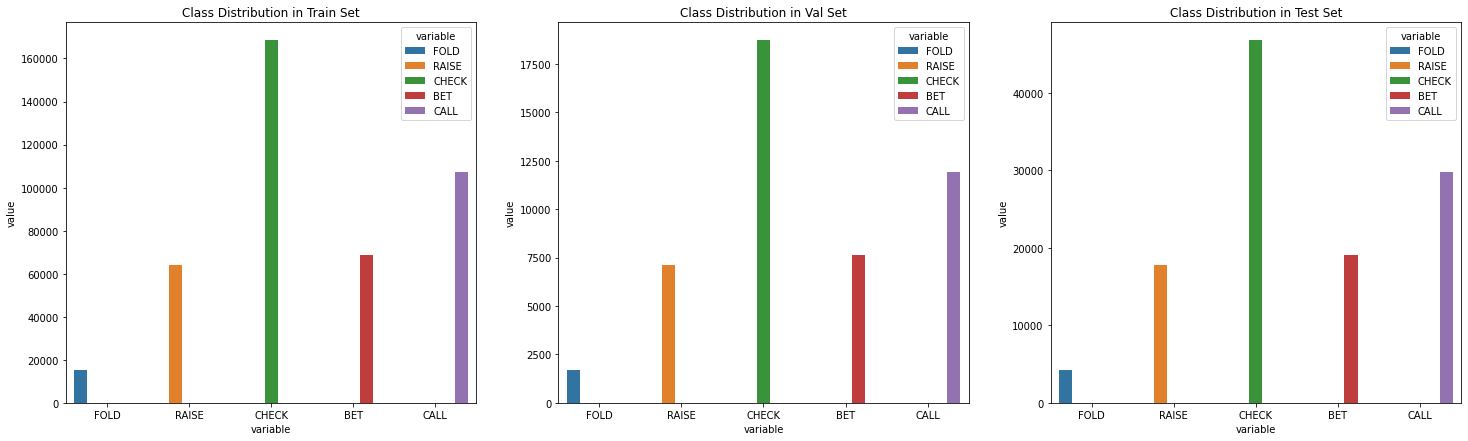

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [33]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [34]:
print(train_dataset)

In [35]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [36]:
print(target_list)

tensor([1, 2, 3,  ..., 3, 2, 4])


In [37]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float)
print(class_weights)

tensor([6.6133e-05, 1.5575e-05, 5.9380e-06, 1.4518e-05, 9.3247e-06])


In [38]:
class_weights_all = class_weights[target_list]

In [39]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [40]:
EPOCHS = 4
BATCH_SIZE = 64
LEARNING_RATE = 0.00007

In [41]:
NUM_FEATURES = 28
NUM_CLASSES = 5

In [42]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [43]:
class MulticlassClassification(nn.Module):
    
    
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        #self.layer_4 = nn.Linear(64, 32)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        #self.batchnorm3 = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        

        
        x = self.layer_out(x)
        
        return x

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [45]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class = NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)


MulticlassClassification(
  (layer_1): Linear(in_features=28, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [46]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc) * 100
    
    return acc

In [47]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [48]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
       
        
    # VALIDATION
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss:{train_epoch_loss/len(train_loader):.5f} | Val Loss : {val_epoch_loss/len(val_loader):.5f} | Train Acc:{train_epoch_acc/len(train_loader):.3f}| Val Acc:{val_epoch_acc/len(val_loader):.3f}')

Begin training.


Epoch 001: | Train Loss:0.69505 | Val Loss : 0.62047 | Train Acc:96.331| Val Acc:69.881
Epoch 002: | Train Loss:0.58305 | Val Loss : 0.60422 | Train Acc:99.849| Val Acc:70.386
Epoch 003: | Train Loss:0.56284 | Val Loss : 0.59183 | Train Acc:99.879| Val Acc:71.333
Epoch 004: | Train Loss:0.55236 | Val Loss : 0.59238 | Train Acc:99.894| Val Acc:70.711



Text(0.5, 1.0, 'Train-Val Loss/Epoch')

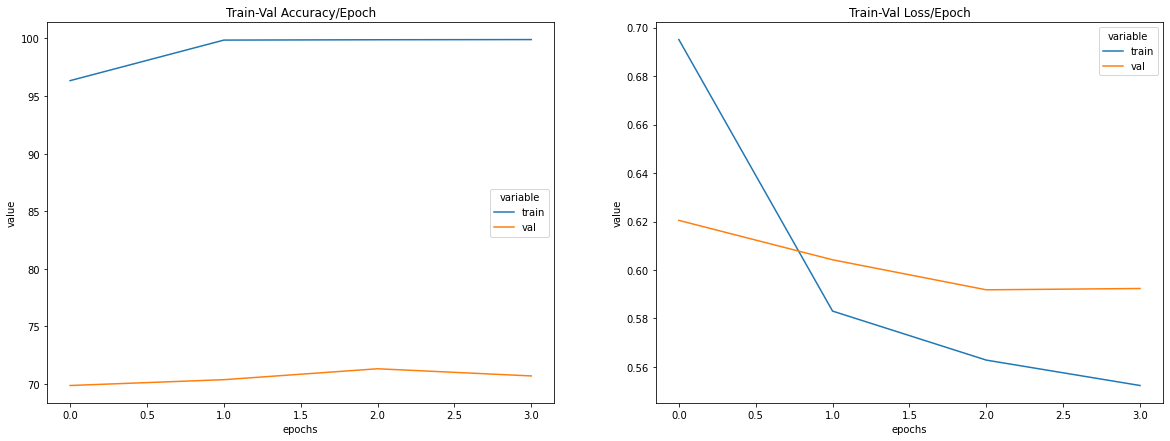

In [49]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [50]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
        

In [51]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      4200
           1       0.79      0.68      0.73     17835
           2       0.79      0.66      0.72     46780
           3       0.42      0.59      0.49     19134
           4       0.87      0.85      0.86     29789

    accuracy                           0.71    117738
   macro avg       0.68      0.75      0.70    117738
weighted avg       0.74      0.71      0.72    117738



<AxesSubplot:>

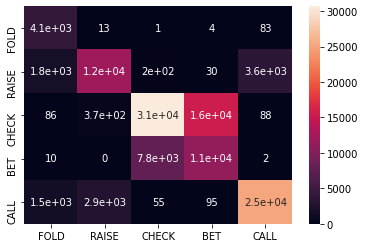

In [52]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True)

In [53]:
PATH = '/home/alexp/anaconda3/pokerai-master/models/train_29_11_2020_1337.pt'

In [54]:
torch.save(model.state_dict(), PATH)

In [55]:
print(sklearn.__version__)

0.23.2


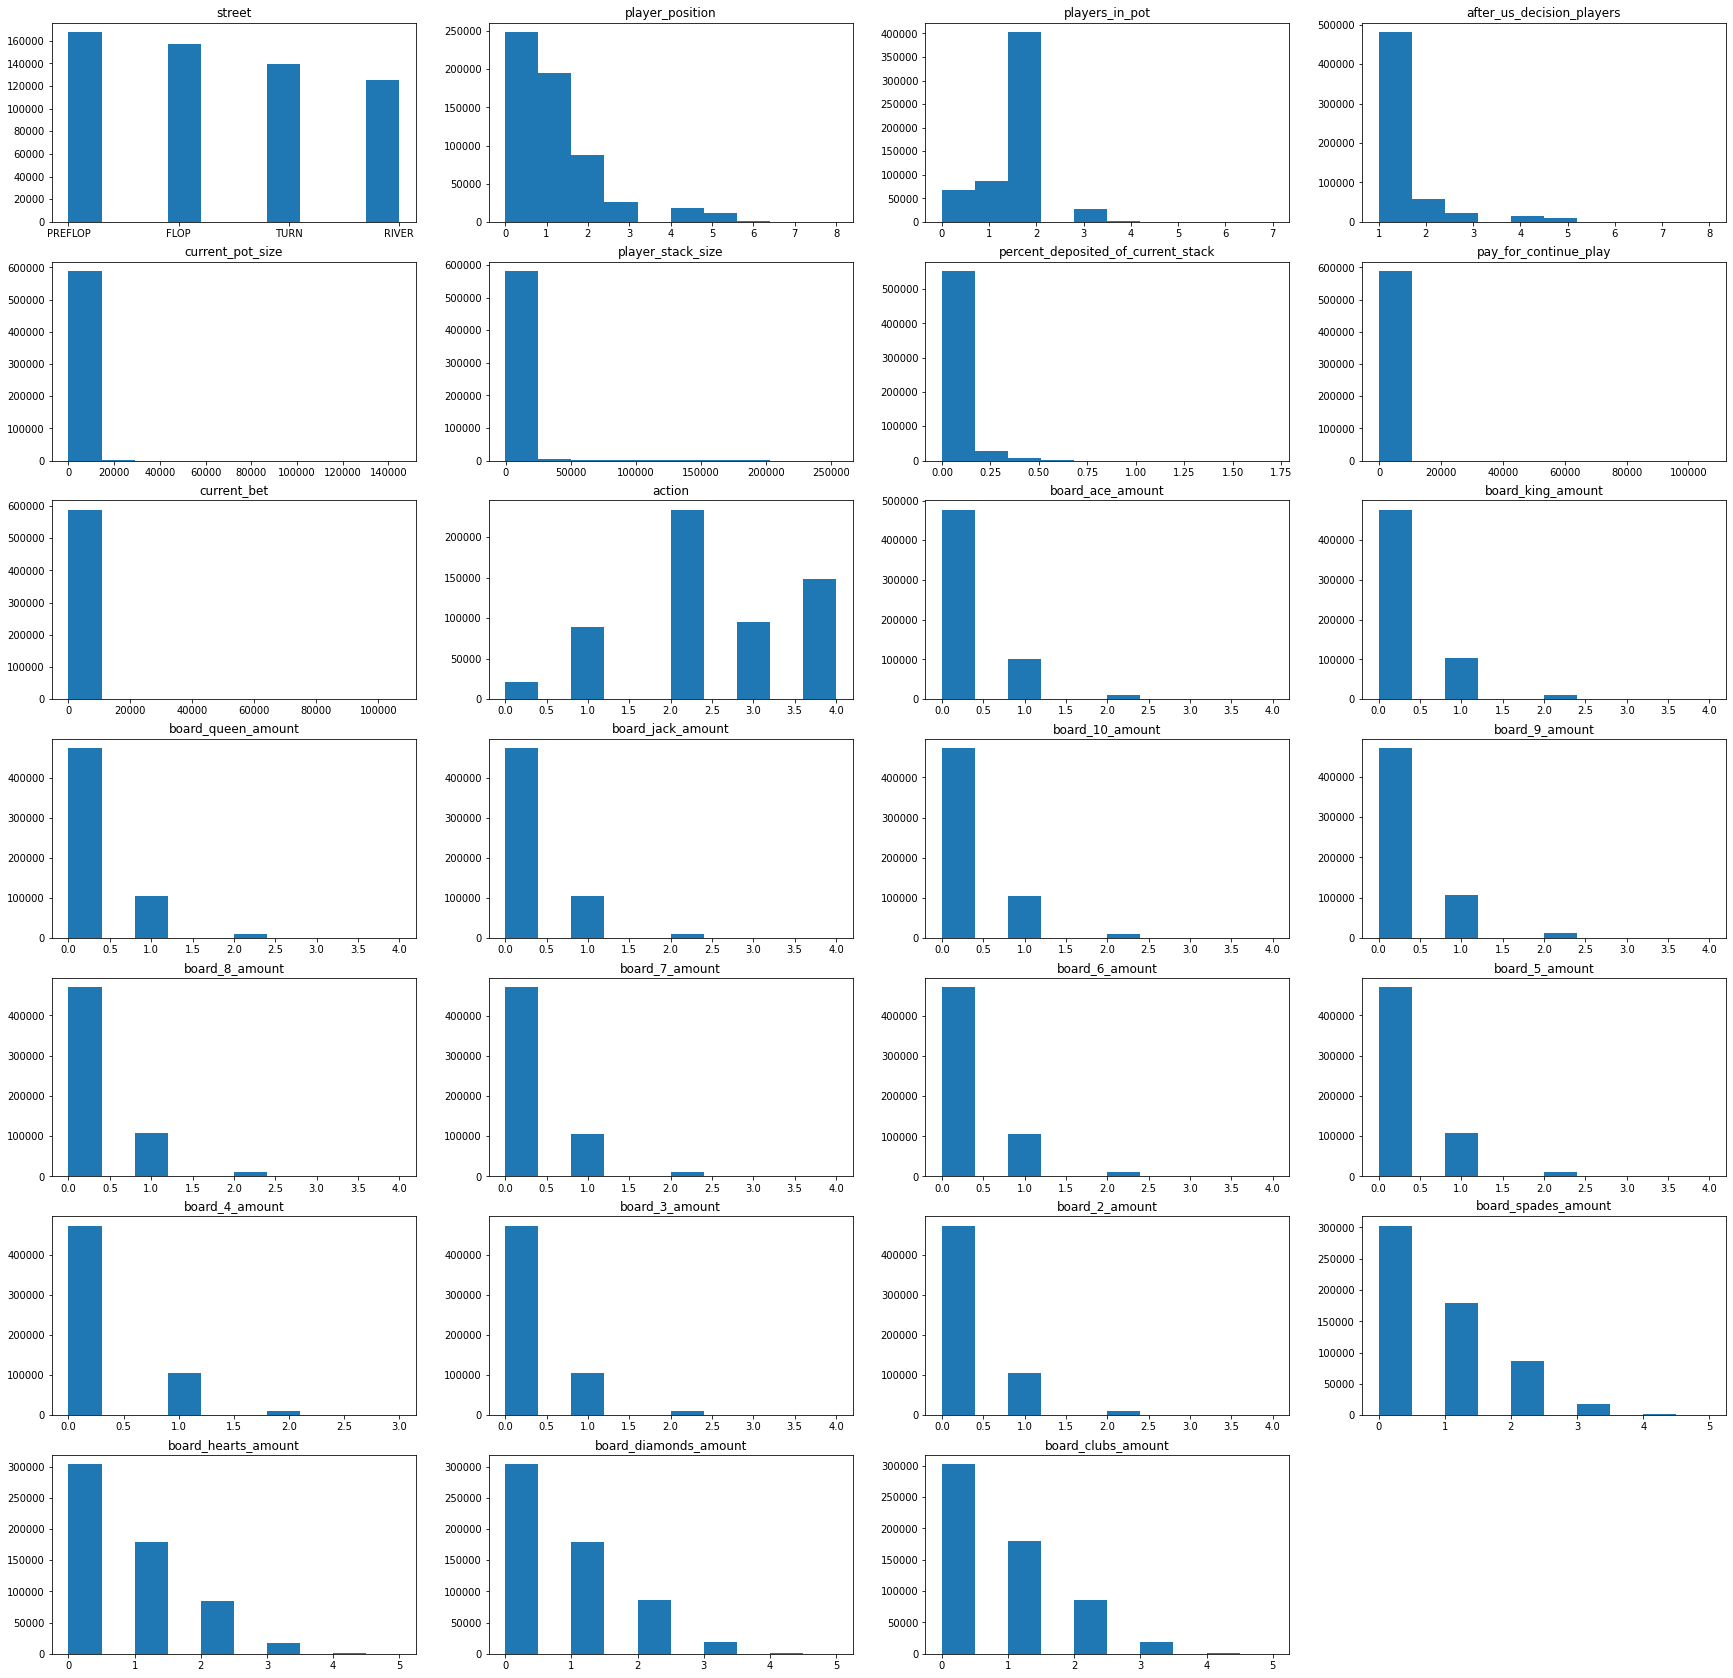

In [56]:
plt.figure(figsize=(30, 30))
for i, col in enumerate(list(df.columns)[2:29]):
    plt.subplot(7, 4, i + 1)
    plt.hist(df[col])
    plt.title(col)

In [58]:
from sklearn.inspection import permutation_importance

In [65]:
from sklearn.linear_model import LogisticRegression